## Neural Networks
## Solve MNIST classification with basic sklearn functions

The goal of this exercise is to familiarise you with working with datasets and transferring the MLP classification from the PRACTICE to one of the standard benchmark datasets: MNIST or fashion MNIST.

Note: The original [MNIST dataset](http://yann.lecun.com/exdb/mnist/) contains 28x28px images of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. *"If it doesn't work on **MNIST**, it won't work at all"*, they said. *"Well, if it does work on MNIST, it may still fail on others."*
A good alternative is using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) for the following reasons:
- MNIST is too easy. Convolutional nets can achieve 99.7% on MNIST (we will introduce this in the next lecture, thus, skip this for now). Classic machine learning algorithms can also achieve 97% easily.
- MNIST is overused.
- MNIST can not represent modern CV tasks.
Thus for your experiments, make your own choice after briefly looking into both.

For the hand-in, go through the following tasks and answer the following questions.

Tasks:
#### 1. Search online about characteristics and usage of the MNIST and/or FashionMNIST data set
FashionMNIST is harder and more modern than MNIST but uses the same format, so you can easily swap them in code.
From ChatGPT:

**MNIST:**

What: 70,000 grayscale images of handwritten digits (0–9)

Size: 28×28 pixels

Use: Benchmark for image classification, especially digit recognition

Good for: Beginners in deep learning & CNNs

**FashionMNIST:**

What: 70,000 grayscale images of clothing items (e.g., shirts, shoes)

Size: 28×28 pixels

Use: More challenging alternative to MNIST

Good for: Testing more realistic image classifiers


#### 2. Build your own "data loader" to prepare training and test splits as well as input data and output labels.
#### 3. Reproduce the steps in the PRACTICE of using the MLP function from sklearn to classify the data.
#### 4. Understand and test what the respective loss function and optimisers are.
## Optional
5. Plot some training progress (e.g. plot the loss)
6. Have a brief (!) experiment with different settings for the hyperparameters: batch_size, learning_rate, hidden_layer_sizes.

Questions:
1. What is the best accuracy that you found?
98%
3. What are good values of batch_size, learning_rate, hidden_layer_sizes?
i changed to 64, kept same learning rate as before, hidden layer sizes (128, 64) and shuffle=True. adam.
That helped me get to 98%


5. What optimiser options did you choose (and why)?

sgd initially, but changed it to adam.

-- Adam is usually better than SGD because it adapts the learning rate for each weight, making learning faster and more stable — especially in noisy, complex tasks like MNIST.

7. What max_iter do you need to converge?

I did 200 and yeah early stopping.

Iteration 62, loss = 0.04669999
Iteration 63, loss = 0.05605599
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Prediction accuracy: 0.971


9. What did you observe in the results for good and bad hyperparameters?

batch_size and hidden layer sizes.
probably because batch_size = 1 was very slow and a small network (8,4)

In [10]:
from IPython.display import display
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import neural_network
import seaborn as sns

#### Load MNIST data
You may consider just using np.loadtxt on https://python-course.eu/data/mnist/mnist_train.csv and https://python-course.eu/data/mnist/mnist_test.csv

In [11]:
data = np.loadtxt("https://python-course.eu/data/mnist/mnist_train.csv", delimiter=',')

In [12]:
print("length: ", len(data))
data

length:  60000


array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.]], shape=(60000, 785))

##### Consider some visualisations to get a feeling for the data set!

(60000, 785)


Text(0.5, 1.0, 'label: 5.0')

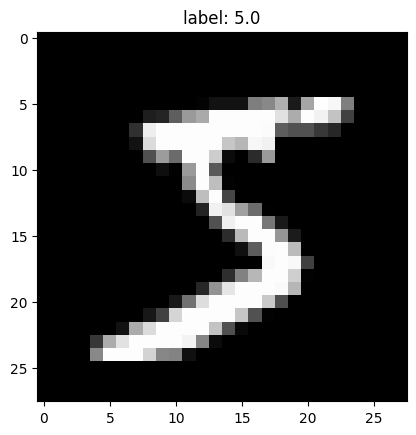

In [13]:
print(data.shape)
X = data[:, 1:]  # all rows, all columns except firs
y = data[:, 0]   # all rows, only first column
plt.imshow(X[0].reshape(28, 28), cmap="gray")
plt.title("label: " + str(y[0]))

#### Build the model

In [60]:
# data.shape = (6000, 785)
# 6000 labels (y-hat, y)
# 785 x 28x28 images (our features, X)

X = data[:, 1:]  # features
y = data[:, 0]   # label


In [61]:
# let's normalize like earlier:
# norm_data = sklearn.preprocessing.normalize(X) - don't do this.
X = X / 255.0 # value will be between [0, 1]
# keeps pixel structure and works better with MLPs using ReLU or sigmoid
print(X)

nonzero_count = np.count_nonzero(X)
print("Non-zero pixel values:", nonzero_count)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Non-zero pixel values: 8994156


In [62]:
from sklearn import model_selection

In [63]:
random_seed = 13
datasplit = 0.2

In [64]:
# for the split we use the sklearn model_selection module
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=datasplit,
    random_state=random_seed)
#display(iris_df_inp_train.head(n=3), iris_df_out_train.head(n=3))
#display(iris_df_inp_test.head(n=3), iris_df_out_test.head(n=3))

In [65]:
# parameters for the MLP shape
# stolen from MLP_iris_basic
hidden_layer_sizes = (128, 64)  # tuple of sizes of hidden layers
activation ='relu'  # activation_fkt, {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}

#parameters for the learning
optimiser = 'adam'  # {‘lbfgs’, ‘sgd’, ‘adam’}
learning_rate_init = 0.01  # learning_rate, try something smaller first!
learning_rate = 'constant'  # learning_rate_type, {‘constant’, ‘invscaling’, ‘adaptive’}
max_iter = 200  # epoches, number of training interations
batch_size = 64  # number of training examples per epoch
momentum = 0.95  # [0,1]

clf_mlp = neural_network.MLPClassifier(
    random_state=random_seed, solver=optimiser, activation=activation,
    hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init,
    max_iter=max_iter, learning_rate=learning_rate, momentum=momentum,
    batch_size=batch_size, nesterovs_momentum=True, alpha=1e-05,
    beta_1=0.9, beta_2=0.999, epsilon=1e-08, early_stopping=False,
    n_iter_no_change=10, power_t=0.5, tol=0.0001, validation_fraction=0.1,
    shuffle=True, verbose=True, warm_start=False)

#### Show prediction and visualisation

In [66]:
clf_mlp.fit(X_train, y_train)

test_accuracy = clf_mlp.score(X_test, y_test)
print("Prediction accuracy:", test_accuracy)

Iteration 1, loss = 0.25022962
Iteration 2, loss = 0.14267408
Iteration 3, loss = 0.12670358
Iteration 4, loss = 0.11112417
Iteration 5, loss = 0.09853321
Iteration 6, loss = 0.10110004
Iteration 7, loss = 0.09590514
Iteration 8, loss = 0.08194894
Iteration 9, loss = 0.08328682
Iteration 10, loss = 0.08021191
Iteration 11, loss = 0.07091047
Iteration 12, loss = 0.08324751
Iteration 13, loss = 0.06655304
Iteration 14, loss = 0.06930716
Iteration 15, loss = 0.06507213
Iteration 16, loss = 0.06463901
Iteration 17, loss = 0.06769470
Iteration 18, loss = 0.06756231
Iteration 19, loss = 0.05442654
Iteration 20, loss = 0.06498782
Iteration 21, loss = 0.05811187
Iteration 22, loss = 0.05822859
Iteration 23, loss = 0.05908905
Iteration 24, loss = 0.06306084
Iteration 25, loss = 0.05034626
Iteration 26, loss = 0.05656372
Iteration 27, loss = 0.05767654
Iteration 28, loss = 0.05113110
Iteration 29, loss = 0.05093363
Iteration 30, loss = 0.05834387
Iteration 31, loss = 0.05055253
Iteration 32, los

Why Each Change Helped:
✅ hidden_layer_sizes = (128, 64)
Gave the network enough neurons to learn complex features from 784 pixels

MNIST needs more than just 8–4 to capture handwriting variation

✅ batch_size = 64
More stable gradients

Less noise in updates

Speeds up convergence compared to batch_size = 1

✅ shuffle = True
Prevents the model from learning weird patterns based on the order of training data

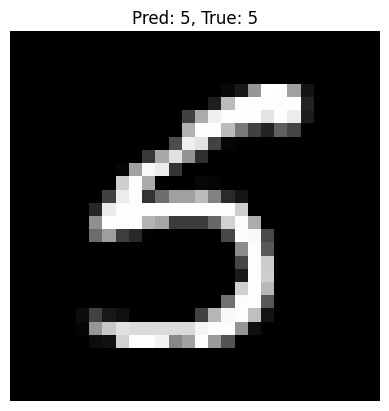

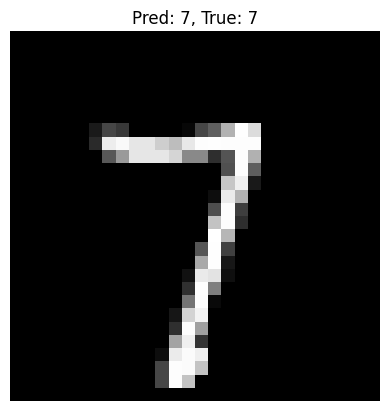

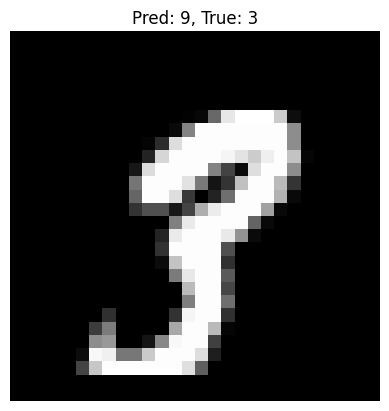

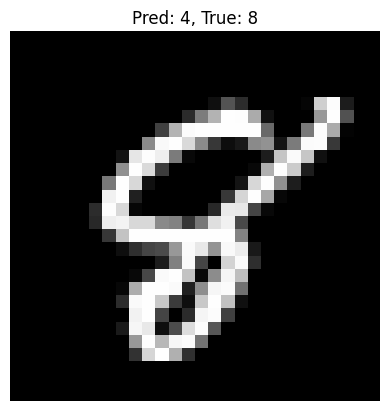

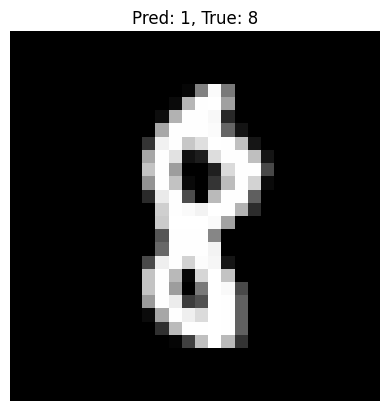

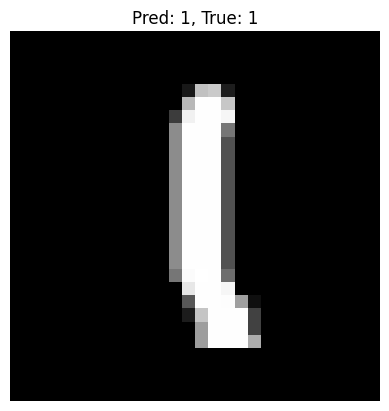

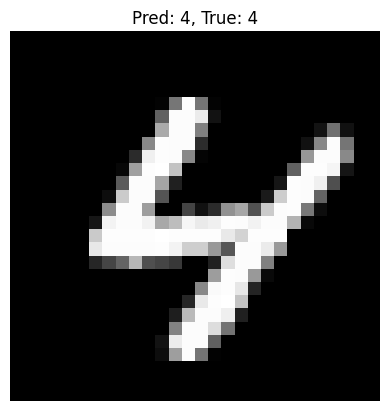

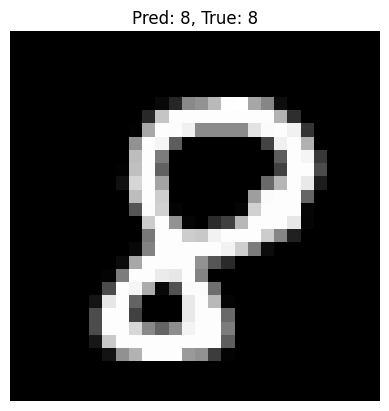

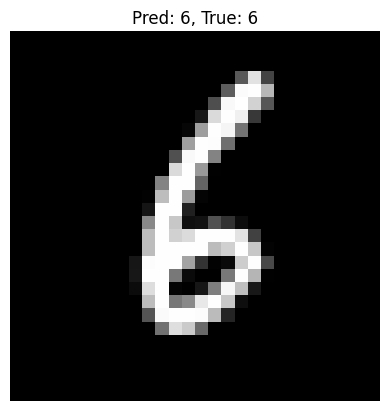

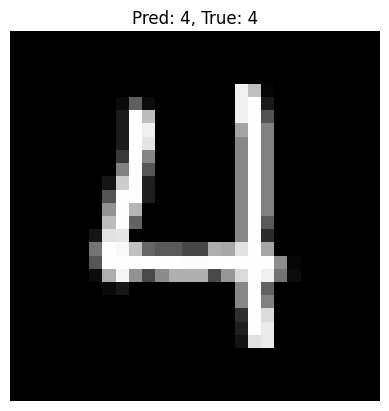

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Pick some test samples
n_samples = 10
indices = np.random.choice(len(X_test), n_samples, replace=False)
sample_images = X_test[indices]
sample_labels = y_test[indices]
predictions = clf_mlp.predict(sample_images)

# Plot them
for i in range(n_samples):
    plt.imshow(sample_images[i].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {int(predictions[i])}, True: {int(sample_labels[i])}")
    plt.axis('off')
    plt.show()
